In [1]:
import numpy as np
from importlib import reload
import sys
sys.path.insert(1, './utils')
sys.path.insert(1, '../gnnmodel/utils')
sys.path.insert(1, '../influencemodel/utils')
sys.path.insert(1, '../mlmodels/utils')

import torch
print(torch.cuda.get_device_name(torch.cuda.current_device()))
print('CUDA Version ' + torch.version.cuda)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

NVIDIA GeForce RTX 2080 Ti
CUDA Version 11.3


### Calculate result metrics

In [2]:
dataDirectoryBase = '../gnnmodel'
imDirectoryBase   = '../influencemodel'
mlModelDirectory  = '../mlmodels'
scalingList   = np.arange(10,21)/10

In [3]:
import collectmetrics
reload(collectmetrics)
metricCollector = collectmetrics.metricCollector(device, scalingList, dataDirectoryBase, imDirectoryBase, mlModelDirectory)

In [4]:
modelTypeList = ['GNN', 'IM', 'SVM', 'BNB', 'LogR']
ieeecaseList = ['IEEE89', 'IEEE118', 'IEEE1354']
for modelType in modelTypeList:
    for ieeecase in ieeecaseList:
        metricCollector.collectGraphMetric(modelType, ieeecase)

Tested on scaling value = random, predicted edge labels size = torch.Size([20000, 206, 19]).
Tested on scaling value = 1.0, predicted edge labels size = torch.Size([1000, 206, 19]).
Tested on scaling value = 1.1, predicted edge labels size = torch.Size([1000, 206, 19]).
Tested on scaling value = 1.2, predicted edge labels size = torch.Size([1000, 206, 19]).
Tested on scaling value = 1.3, predicted edge labels size = torch.Size([1000, 206, 19]).
Tested on scaling value = 1.4, predicted edge labels size = torch.Size([1000, 206, 19]).
Tested on scaling value = 1.5, predicted edge labels size = torch.Size([1000, 206, 19]).
Tested on scaling value = 1.6, predicted edge labels size = torch.Size([1000, 206, 19]).
Tested on scaling value = 1.7, predicted edge labels size = torch.Size([1000, 206, 19]).
Tested on scaling value = 1.8, predicted edge labels size = torch.Size([1000, 206, 19]).
Tested on scaling value = 1.9, predicted edge labels size = torch.Size([1000, 206, 19]).
Tested on scaling

Tested on scaling value = 1.2, predicted edge labels size = (1000, 179).
Tested on scaling value = 1.3, predicted edge labels size = (1000, 179).
Tested on scaling value = 1.4, predicted edge labels size = (1000, 179).
Tested on scaling value = 1.5, predicted edge labels size = (1000, 179).
Tested on scaling value = 1.6, predicted edge labels size = (1000, 179).
Tested on scaling value = 1.7, predicted edge labels size = (1000, 179).
Tested on scaling value = 1.8, predicted edge labels size = (1000, 179).
Tested on scaling value = 1.9, predicted edge labels size = (1000, 179).
Tested on scaling value = 2.0, predicted edge labels size = (1000, 179).
Collected results for model = BNB, case = IEEE118.
 
Tested on scaling value = 1.0, predicted edge labels size = (1000, 1710).
Tested on scaling value = 1.1, predicted edge labels size = (1000, 1710).
Tested on scaling value = 1.2, predicted edge labels size = (1000, 1710).
Tested on scaling value = 1.3, predicted edge labels size = (1000, 1

### Plot results

In [9]:
import saveresults
reload(saveresults)

<module 'saveresults' from 'C:\\Users\\Windows\\Desktop\\Chadaga\\Failure Cascade\\results\\./utils\\saveresults.py'>

#### Plot ML results only (for thesis)

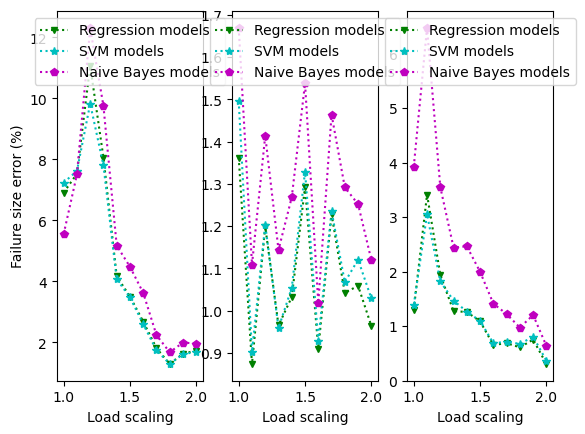

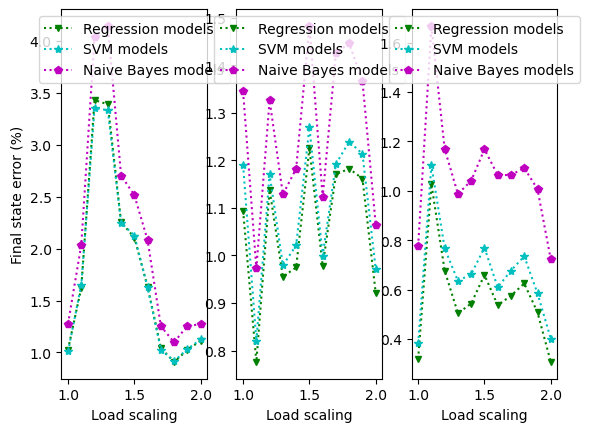

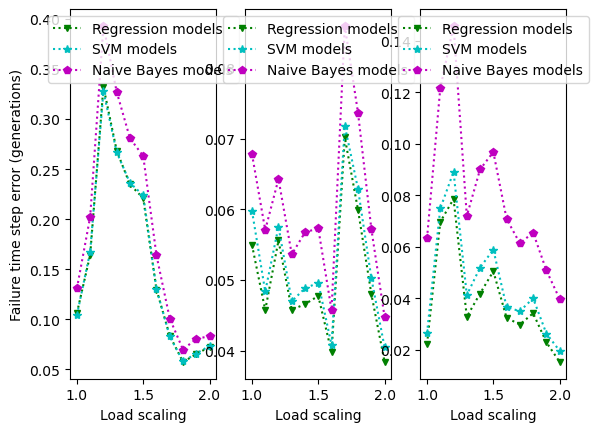

In [10]:
modelTypeListToPlot = ['LogR', 'SVM', 'BNB']
ieeecaseListToPlot = ['IEEE89', 'IEEE118', 'IEEE1354']
saveFolder = './figs/thesis/ml/graph-level'

saveLocation = saveFolder + '/failure-size/graphlevelplot.tex'
saveresults.plotAndSaveResult('scaling', 'failure-size', metricCollector.graphMetrics, ieeecaseListToPlot, modelTypeListToPlot, 'upper center', saveLocation, ':')

saveLocation = saveFolder + '/final-state/graphlevelplot.tex'
saveresults.plotAndSaveResult('scaling', 'final-state', metricCollector.graphMetrics, ieeecaseListToPlot, modelTypeListToPlot, 'upper center', saveLocation, ':')

saveLocation = saveFolder + '/failure-step/graphlevelplot.tex'
saveresults.plotAndSaveResult('scaling', 'failure-step', metricCollector.graphMetrics, ieeecaseListToPlot, modelTypeListToPlot, 'upper center', saveLocation, ':')

#### Plot GNN, IM, and ML results (for thesis)

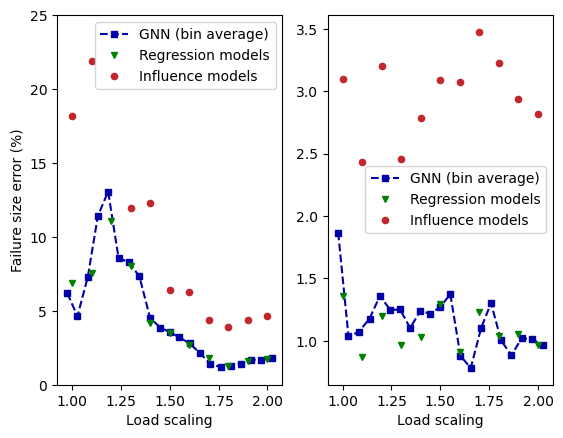

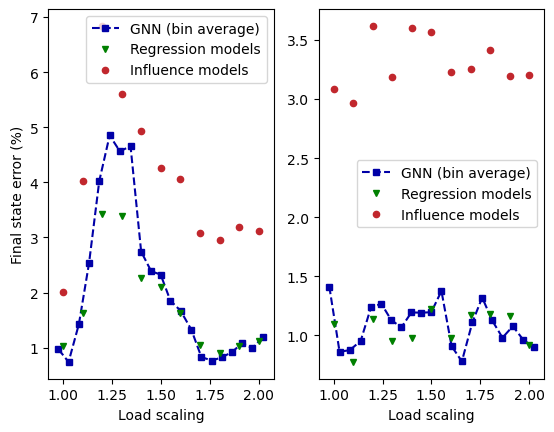

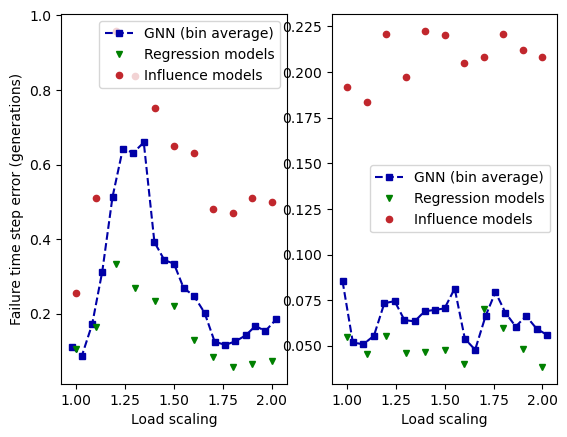

In [11]:
modelTypeListToPlot = ['GNN', 'LogR', 'IM']
ieeecaseListToPlot = ['IEEE89', 'IEEE118']
saveFolder = './figs/thesis/gnn/graph-level'

saveLocation = saveFolder + '/failure-size/graphlevelplot.tex'
saveresults.plotAndSaveResult('scaling', 'failure-size', metricCollector.graphMetrics, ieeecaseListToPlot, modelTypeListToPlot, 'best', saveLocation)

saveLocation = saveFolder + '/final-state/graphlevelplot.tex'
saveresults.plotAndSaveResult('scaling', 'final-state', metricCollector.graphMetrics, ieeecaseListToPlot, modelTypeListToPlot, 'best', saveLocation)

saveLocation = saveFolder + '/failure-step/graphlevelplot.tex'
saveresults.plotAndSaveResult('scaling', 'failure-step', metricCollector.graphMetrics, ieeecaseListToPlot, modelTypeListToPlot, 'best', saveLocation)

#### Plot GNN and IM results (for allerton paper)

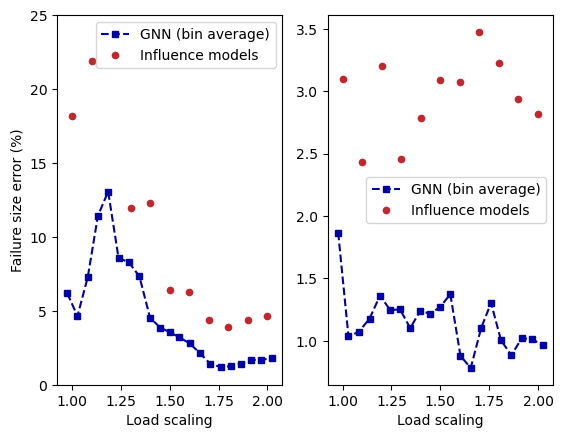

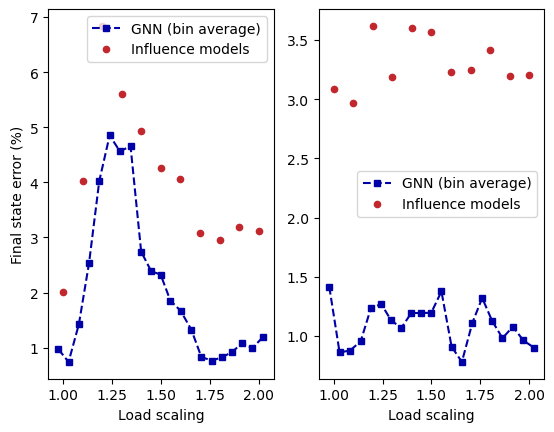

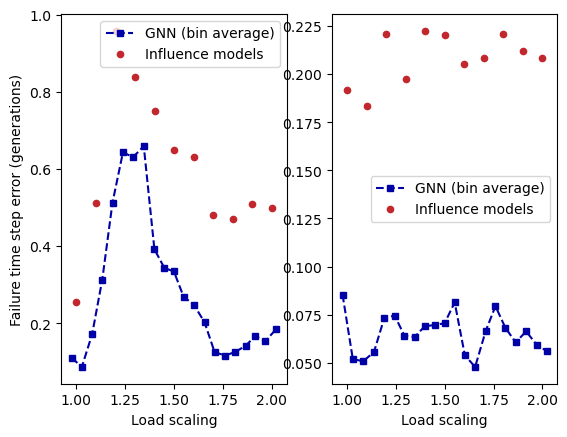

In [12]:
modelTypeListToPlot = ['GNN', 'IM']
ieeecaseListToPlot = ['IEEE89', 'IEEE118']
saveFolder = './figs/allerton/gnn/graph-level'

saveLocation = saveFolder + '/failure-size/graphlevelplot.tex'
saveresults.plotAndSaveResult('scaling', 'failure-size', metricCollector.graphMetrics, ieeecaseListToPlot, modelTypeListToPlot, 'best', saveLocation)

saveLocation = saveFolder + '/final-state/graphlevelplot.tex'
saveresults.plotAndSaveResult('scaling', 'final-state', metricCollector.graphMetrics, ieeecaseListToPlot, modelTypeListToPlot, 'best', saveLocation)

saveLocation = saveFolder + '/failure-step/graphlevelplot.tex'
saveresults.plotAndSaveResult('scaling', 'failure-step', metricCollector.graphMetrics, ieeecaseListToPlot, modelTypeListToPlot, 'best', saveLocation)